In [16]:
import pandas as pd
!pip install seaborn

# Sample data
data = {
    "age": [18393, 20228, 18857, 17623, 17474],
    "height": [168, 156, 165, 169, 156],
    "weight": [62.0, 85.0, 64.0, 82.0, 56.0],
    "gender": [2, 1, 2, 1, 2],
    "ap_hi": [110, 140, 120, 150, 130],
    "ap_lo": [80, 90, 80, 100, 90],
    "cholesterol": [1, 2, 1, 3, 1],
    "gluc": [1, 2, 1, 3, 1],
    "smoke": [0, 0, 0, 1, 0],
    "alco": [0, 0, 0, 1, 0],
    "active": [1, 1, 0, 0, 1],
    "cardio": [0, 1, 0, 1, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("medical_examination.csv", index=False)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\shash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
print(df)

     age  height  weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393     168    62.0       2    110     80            1     1      0   
1  20228     156    85.0       1    140     90            2     2      0   
2  18857     165    64.0       2    120     80            1     1      0   
3  17623     169    82.0       1    150    100            3     3      1   
4  17474     156    56.0       2    130     90            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       0  
3     1       0       1  
4     0       1       0  


### 📐 BMI Formula:

**BMI = weight (kg) / (height (m))²**

### ✅ Overweight Criteria:

- If **BMI > 25** → `overweight = 1` (Yes)
- Else → `overweight = 0` (No)

In [30]:
# Import the data from medical_examination.csv and assign it to the df variable.
data = pd.read_csv("./medical_examination.csv")
df = pd.DataFrame(data)
height_m = df['height'] / 100

# cal bmi

bmi = df['weight']  / (height_m ** 2)

#  add overweight at column
df['overweight'] = (bmi > 25).astype(int)
# print(df)
df.to_csv("medical_examination_with_overweight.csv", index=False)

print(df[['height', 'weight', 'overweight']].head())

   height  weight  overweight
0     168    62.0           0
1     156    85.0           1
2     165    64.0           0
3     169    82.0           1
4     156    56.0           0


In [29]:
# Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.to_csv("medical_examination_with_overweight.csv", index=False)
print(df[['cholesterol',"gluc"]])

   cholesterol  gluc
0            0     0
1            0     0
2            0     0
3            0     0
4            0     0


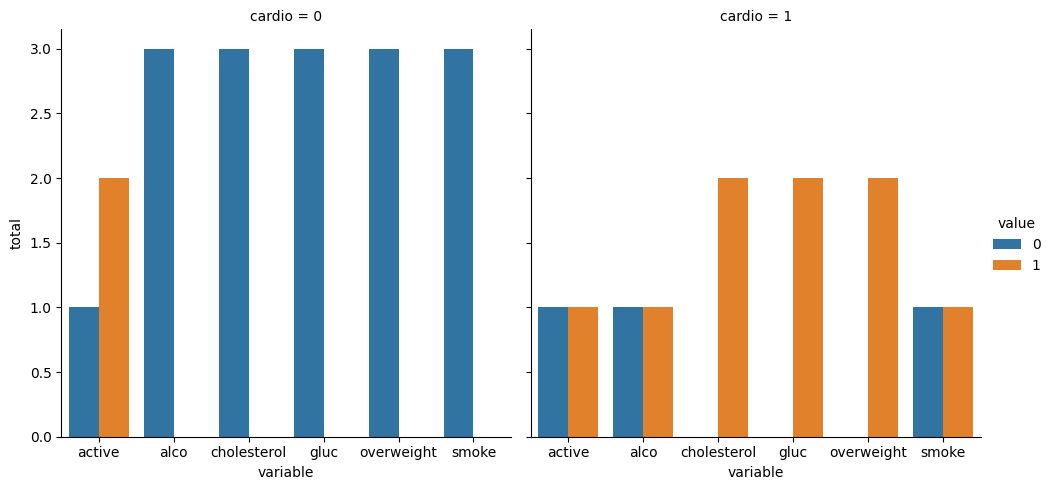

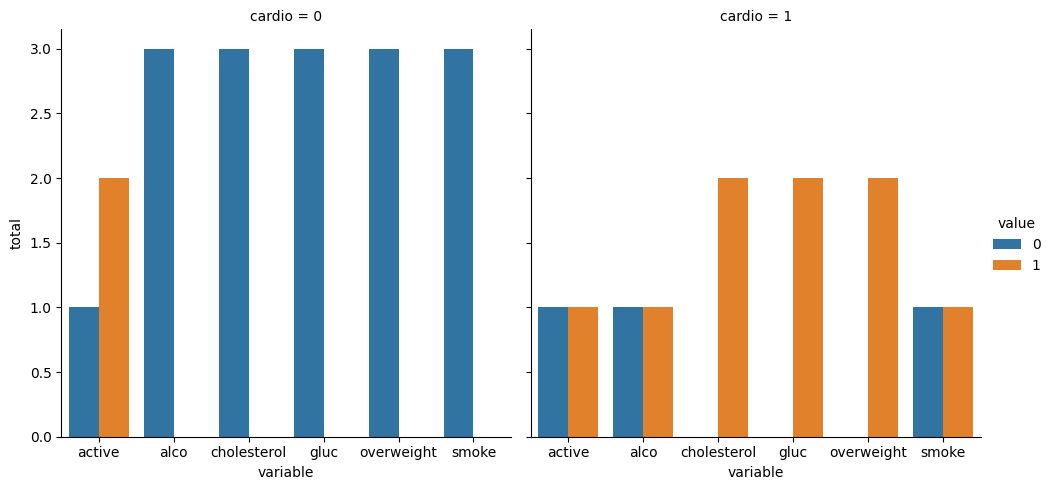

In [31]:
# Draw the Categorical Plot in the draw_cat_plot function ?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def draw_cat_plot():
    # Load the cleaned and normalized data
    df = pd.read_csv("./medical_examination_with_overweight.csv")

    # Create 'overweight' column if not already present
    if 'overweight' not in df.columns:
        df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)

    # Normalize cholesterol and glucose
    df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
    df['gluc'] = (df['gluc'] > 1).astype(int)

    # Melt the data to long format
    df_cat = pd.melt(
        df,
        id_vars=["cardio"],
        value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
    )

    # Group and reformat the data
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # Create categorical plot using Seaborn
    fig = sns.catplot(
        data=df_cat,
        x='variable',
        y='total',
        hue='value',
        col='cardio',
        kind='bar'
    ).fig

    # Save plot (optional)
    fig.savefig('catplot.png')
    return fig

# Call function
draw_cat_plot()

In [37]:
# Create a DataFrame for the cat plot using pd.
# melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
    # Load the data
df = pd.read_csv("./medical_examination_with_overweight.csv")

# Melt the DataFrame
df_cat = pd.melt(
    df,
    id_vars=["cardio"],  # Use 'cardio' as the category we group by
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
    var_name="variable",
    value_name="value"
)
# Group and reformat the data for categorical plot
df_cat = (
df_cat
.groupby(["cardio", "variable", "value"])
.size()
.reset_index(name="total")  # Rename the count column to 'total'
)

print(df_cat.head())  # Show first few rows



   cardio     variable  value  total
0       0       active      0      1
1       0       active      1      2
2       0         alco      0      3
3       0  cholesterol      1      3
4       0         gluc      1      3


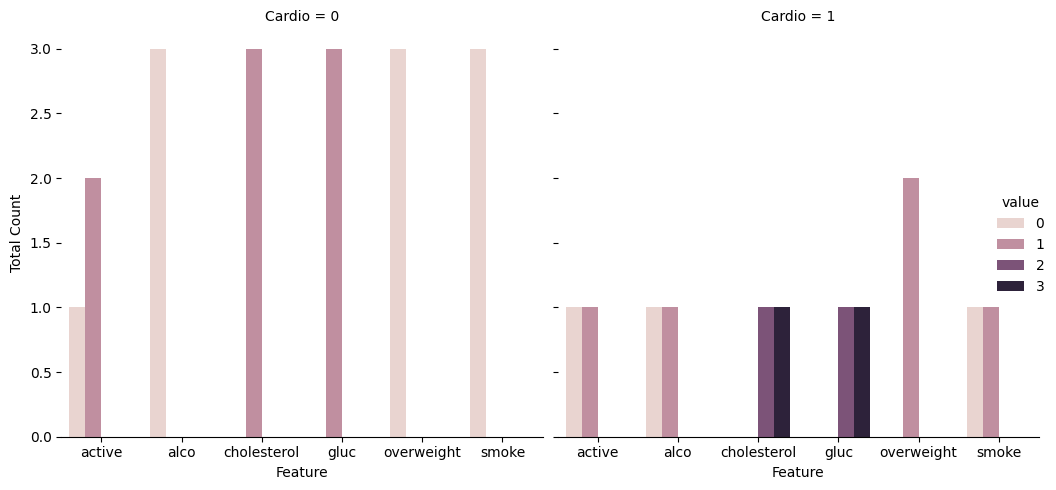

In [39]:
plot = sns.catplot(
    data=df_cat,
    x="variable",
    y="total",
    hue="value",
    col="cardio",
    kind="bar"
)

fig = plot.figure

# Optional formatting
plot.set_axis_labels("Feature", "Total Count")
plot.set_titles("Cardio = {col_name}")
plot.despine(left=True)
plt.tight_layout()

# Show plot (optional)
plt.show()

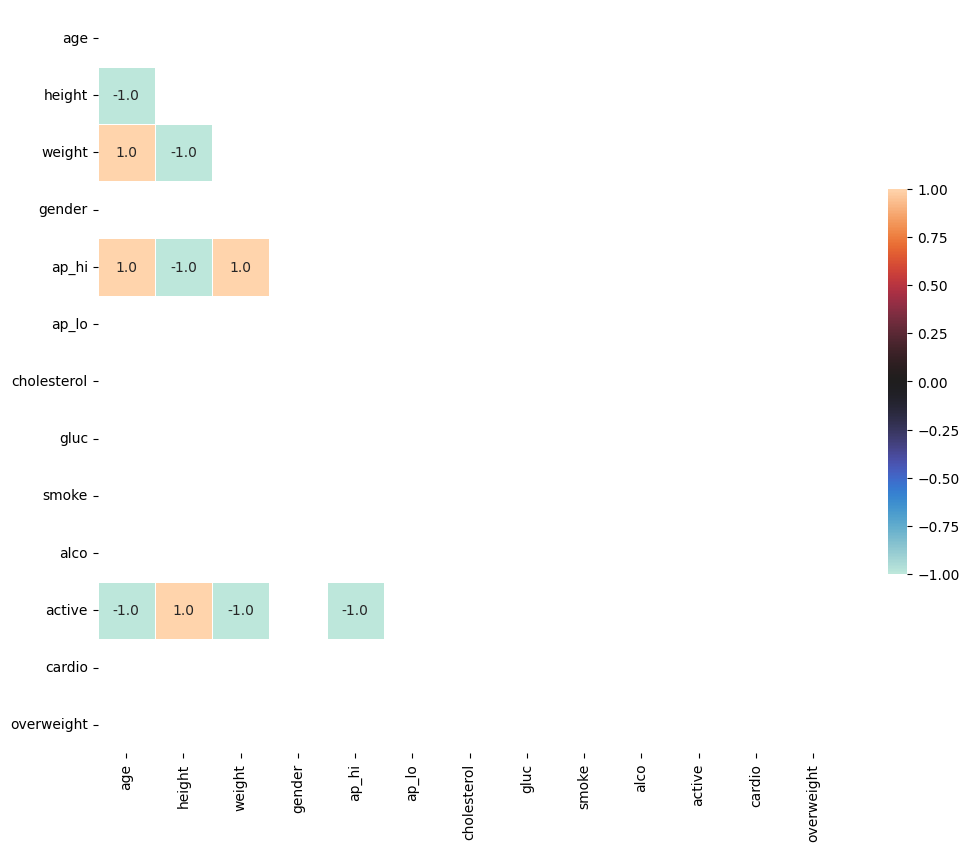

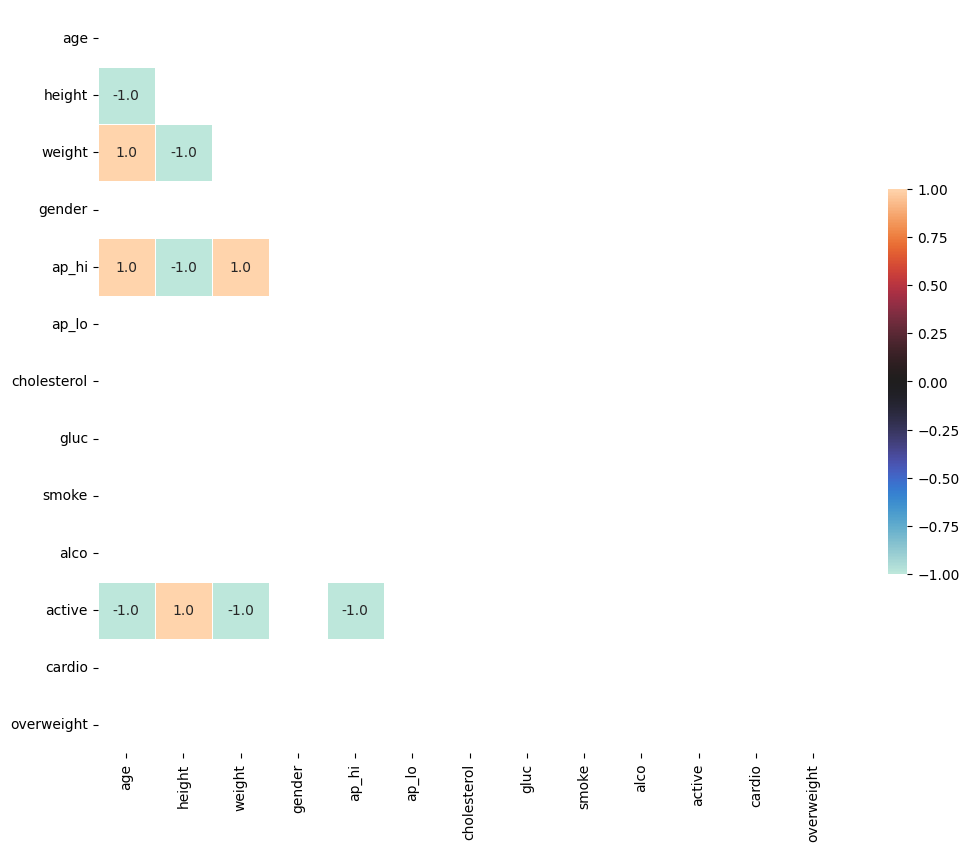

In [42]:
import numpy as np
def draw_heat_map():
    # Load data
    df = pd.read_csv("./medical_examination_with_overweight.csv")

    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr(numeric_only=True)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".1f",
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5}
    )

    return fig

draw_heat_map()